In [134]:
#library required

import os
import time 
from datetime import datetime
import io 
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [42]:
#Loading the data from csv

# Define the file path
file_path = r"C:\Users\Poovesh Kumar M\Downloads\Planning\1_Data\4_Sep_11_09_2024\demand_planning_KA_13_09_2024.csv"

# Read the CSV file into a DataFrame
df_base = pd.read_csv(file_path)

# Display the DataFrame
print(df_base)



           brand sales_channel  sales_date sale_month_year        asin  \
0        katchon    Amazon.com  2024-08-06         08-2024  B09X1MWN5K   
1        katchon    Amazon.com  2024-01-20         01-2024  B09PNMV1H9   
2        katchon     Amazon.ca  2024-06-10         06-2024  B09N1SCJQD   
3        katchon    Amazon.com  2023-05-25         05-2023  B0BRSYX3LG   
4        katchon    Amazon.com  2024-06-29         06-2024  B0D6Z5YKNT   
...          ...           ...         ...             ...         ...   
5004933  katchon    Amazon.com  2023-01-31         01-2023  B0BVVS5L23   
5004934  katchon    Amazon.com  2022-12-09         12-2022  B09DG8DF49   
5004935  katchon     Amazon.ca  2024-05-14         05-2024  B0B12V6YYJ   
5004936  katchon    Amazon.com  2023-09-19         09-2023  B08KGN6WWV   
5004937  katchon    Amazon.com  2023-09-13         09-2023  B0BJVWBXRT   

        earliest_date_brand_channel currency   asp   gmv  inorganic_gmv  ...  \
0                        2022-0

In [43]:
# Filter (df2): brand x channel level into individual dataframes
    
# df_bh_us = df_base[(df_base['brand'] == 'botanic hearth') & (df_base['sales_channel'] == 'Amazon.com')] 
# df_bh_ca = df_base[(df_base['brand'] == 'botanic hearth') & (df_base['sales_channel'] == 'Amazon.ca')] 
df_fk_us = df_base[(df_base['brand'] == 'katchon') & (df_base['sales_channel'] == 'Amazon.com')] 
df_fk_ca = df_base[(df_base['brand'] == 'katchon') & (df_base['sales_channel'] == 'Amazon.ca')]

#Save the brand x sales channel DataFrame to an csv file
date_str = '11_09_24'

# df_bh_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_us_' + date_str + '.csv', index=False) 
# df_bh_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_bh_ca_' + date_str + '.csv', index=False) 
df_fk_us.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_ka_us_' + date_str + '.csv', index=False) 
df_fk_ca.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/df_ka_ca_' + date_str + '.csv', index=False)

In [53]:
# Read the CSV file into a DataFrame - to roll up
df_mp = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/4_Sep_11_09_2024/df_ka_us_11_09_24.csv")
df_mp


df_bs1 = df_mp

# Step 2: Create a list of distinct 'brand' and 'sales_channel' combinations
brands_channel_list = [f"{brand.replace('.', '_')}_{channel.replace('.', '_')}" 
                       for brand, channel in df_bs1[['brand', 'sales_channel']].drop_duplicates().values]

# Step 3: Convert the list to a single string, separated by commas
brands_channel_str = ', '.join(brands_channel_list)

# Display the combined string
print(brands_channel_str)

katchon_Amazon_com


In [54]:
df_bs1

,brand,sales_channel,sales_date,sale_month_year,asin,earliest_date_brand_channel,currency,asp,gmv,inorganic_gmv,...,category,sub_category,product_type,theme,dros,cummulative_ros,velocity_bucket,vb_created_datetime,inorganic_gmv_units,organic_gmv_units
0,katchon,Amazon.com,2024-08-06,08-2024,B09X1MWN5K,2022-04-01,USD,9.97,9.97,0.0,...,Graduation,Seasonal,Wall Poster,Graduation,NaN,NaN,NaN,NaN,0.0,1.0
1,katchon,Amazon.com,2024-01-20,01-2024,B09PNMV1H9,2022-04-01,USD,0.00,0.00,0.0,...,Number Balloons,Non-Seasonal,"40 Inch,Gold",Birthday,NaN,NaN,NaN,NaN,0.0,0.0
2,katchon,Amazon.com,2023-05-25,05-2023,B0BRSYX3LG,2022-04-01,USD,0.00,0.00,0.0,...,Anniversary,Non-Seasonal,Foil Balloons,Non-Seasonal,NaN,NaN,NaN,NaN,0.0,0.0
3,katchon,Amazon.com,2024-06-29,06-2024,B0D6Z5YKNT,2022-04-01,USD,0.00,0.00,0.0,...,Halloween,Seasonal,Door Banner,Halloween,NaN,NaN,NaN,NaN,0.0,0.0
4,katchon,Amazon.com,2023-06-17,06-2023,B09JG7XNDX,2022-04-01,USD,0.00,0.00,0.0,...,New Year,Seasonal,Huge Set,New Year,NaN,NaN,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4461980,katchon,Amazon.com,2022-06-16,06-2022,B013RLGOMQ,2022-04-01,USD,0.00,0.00,0.0,...,Birthday,Non-Seasonal,Balloons,Birthday,NaN,NaN,NaN,NaN,0.0,0.0
4461981,katchon,Amazon.com,2023-01-31,01-2023,B0BVVS5L23,2022-04-01,USD,0.00,0.00,0.0,...,Number Balloons,Non-Seasonal,50 Inch Rose Gold,Birthday,NaN,NaN,NaN,NaN,0.0,0.0
4461982,katchon,Amazon.com,2022-12-09,12-2022,B09DG8DF49,2022-04-01,USD,0.00,0.00,0.0,...,Thanks Giving,Seasonal,Yard Banner,Thanks Giving,NaN,NaN,NaN,NaN,0.0,0.0
4461983,katchon,Amazon.com,2023-09-19,09-2023,B08KGN6WWV,2022-04-01,USD,0.00,0.00,0.0,...,New Year,Seasonal,Banner,New Year,NaN,NaN,NaN,NaN,0.0,0.0


In [55]:
#Weekly Roll up data with organic & inorganic share:

# Convert 'sales_date' to datetime format if it isn't already
df_bs1['sales_date'] = pd.to_datetime(df_bs1['sales_date'])

# Extract the week and year, setting the week to start on Monday and end on Sunday
df_bs1['Week_Start_date'] = df_bs1['sales_date'].dt.to_period('W-SUN').apply(lambda r: r.start_time.date())
df_bs1['Week_End_date'] = df_bs1['sales_date'].dt.to_period('W-SUN').apply(lambda r: r.end_time.date())

# Select only the relevant columns
df_bs1 = df_bs1[['velocity_bucket','asin','sales_date','Week_Start_date','Week_End_date','currency', 'gmv_units','organic_gmv_units','inorganic_gmv_units',
                  'ad_spend','inventory_available', 'gmv', 'inorganic_gmv', 'organic_gmv']]


# Create a new column to flag days with inventory available
df_bs1['inventory_flag'] = df_bs1['inventory_available'] > 0

# Group by 'asin' and 'Week_Start_date' to summarize the necessary columns
df_weekly = df_bs1.groupby(['asin', 'Week_Start_date'], as_index=False).agg({
    'velocity_bucket': 'first',  # Assuming velocity_bucket doesn't change within a week for an ASIN
    'gmv_units': 'sum',
    'organic_gmv_units': 'sum',
    'inorganic_gmv_units': 'sum',
    'ad_spend': 'sum',
    'inventory_available': 'sum',
    'gmv': 'sum',
    'inorganic_gmv': 'sum',
    'organic_gmv': 'sum',
    'inventory_flag': 'sum'  # Sum the True values (which represent days with inventory)
})

# Recalculate Week_End_date since it was lost during grouping
df_weekly['Week_End_date'] = df_weekly['Week_Start_date'] + pd.to_timedelta(6, unit='d')

# Calculate the total number of days inventory data is present in that week
df_weekly = df_weekly.assign(total_days=lambda x: df_bs1.groupby(['asin', 'Week_Start_date'])['sales_date'].transform('nunique'))

# Calculate inventory_Availability% = (count of days with inventory_available > 0) / total days inventory is present * 100
df_weekly['inventory_Availability%'] = (df_weekly['inventory_flag'] / df_weekly['total_days']) * 100

# Calculate asp_week = sum(gmv) / sum(gmv_units)
df_weekly['asp_week'] = df_weekly['gmv'] / df_weekly['gmv_units']

# Select relevant columns for the final DataFrame
df_weekly = df_weekly[['velocity_bucket', 'asin', 'Week_Start_date', 'Week_End_date',
                             'organic_gmv_units', 'inorganic_gmv_units','gmv_units', 'asp_week', 'ad_spend','inventory_Availability%',
                               'gmv', 'inorganic_gmv', 'organic_gmv','inventory_available' ]]


C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_30380\4089374526.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs1['inventory_flag'] = df_bs1['inventory_available'] > 0


In [56]:
df_weekly.head()

df_weekly['Week_Start_date'] = pd.to_datetime(df_weekly['Week_Start_date'])

df_weekly = df_weekly[df_weekly['Week_Start_date'] <= '2024-08-26']

# Save the weekly report to a CSV file
df_weekly.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/B1 katchon/0_Data/'+brands_channel_str+'_weekly_data.csv', index=False)


In [57]:
#Monthly Roll up data with organic & inorganic share:

# Convert 'sales_date' to datetime format if it isn't already
df_bs1['sales_date'] = pd.to_datetime(df_bs1['sales_date'])

# Extract the month and year
df_bs1['Month_Start_date'] = df_bs1['sales_date'].dt.to_period('M').apply(lambda r: r.start_time.date())
df_bs1['Month_End_date'] = df_bs1['sales_date'].dt.to_period('M').apply(lambda r: r.end_time.date())

# Select only the relevant columns
df_bs1 = df_bs1[['velocity_bucket','asin','sales_date','Month_Start_date','Month_End_date','currency', 'gmv_units','organic_gmv_units','inorganic_gmv_units',
                  'ad_spend','inventory_available', 'gmv', 'inorganic_gmv', 'organic_gmv']]

# Create a new column to flag days with inventory available
df_bs1['inventory_flag'] = df_bs1['inventory_available'] > 0

# Group by 'asin' and 'Month_Start_date' to summarize the necessary columns
df_monthly = df_bs1.groupby(['asin', 'Month_Start_date'], as_index=False).agg({
    'velocity_bucket': 'first',  # Assuming velocity_bucket doesn't change within a month for an ASIN
    'gmv_units': 'sum',
    'organic_gmv_units': 'sum',
    'inorganic_gmv_units': 'sum',
    'ad_spend': 'sum',
    'inventory_available': 'sum',
    'gmv': 'sum',
    'inorganic_gmv': 'sum',
    'organic_gmv': 'sum',
    'inventory_flag': 'sum'  # Sum the True values (which represent days with inventory)
})

# Recalculate Month_End_date since it was lost during grouping
df_monthly['Month_End_date'] = df_monthly['Month_Start_date'].apply(lambda d: pd.to_datetime(d) + pd.offsets.MonthEnd(0))

# Calculate the total number of days inventory data is present in that month
df_monthly = df_monthly.assign(total_days=lambda x: df_bs1.groupby(['asin', 'Month_Start_date'])['sales_date'].transform('nunique'))

# Calculate inventory_Availability% = (count of days with inventory_available > 0) / total days inventory is present * 100
df_monthly['inventory_Availability%'] = (df_monthly['inventory_flag'] / df_monthly['total_days']) * 100

# Calculate asp_month = sum(gmv) / sum(gmv_units)
df_monthly['asp_month'] = df_monthly['gmv'] / df_monthly['gmv_units']

# Select relevant columns for the final DataFrame
df_monthly = df_monthly[['velocity_bucket', 'asin', 'Month_Start_date', 'Month_End_date',
                             'organic_gmv_units', 'inorganic_gmv_units','gmv_units', 'asp_month', 'ad_spend','inventory_Availability%',
                               'gmv', 'inorganic_gmv', 'organic_gmv','inventory_available' ]]


C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_30380\457037715.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs1['sales_date'] = pd.to_datetime(df_bs1['sales_date'])
C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_30380\457037715.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bs1['Month_Start_date'] = df_bs1['sales_date'].dt.to_period('M').apply(lambda r: r.start_time.date())
C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_30380\457037715.py:8: SettingWithCopyWarning: 
A 

In [58]:
df_monthly

,velocity_bucket,asin,Month_Start_date,Month_End_date,organic_gmv_units,inorganic_gmv_units,gmv_units,asp_month,ad_spend,inventory_Availability%,gmv,inorganic_gmv,organic_gmv,inventory_available
0,NaN,B00CH1LB3A,2022-04-01,2022-04-30,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
1,NaN,B00CH1LB3A,2022-05-01,2022-05-31,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
2,NaN,B00CH1LB3A,2022-06-01,2022-06-30,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
3,NaN,B00CH1LB3A,2022-07-01,2022-07-31,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
4,NaN,B00CH1LB3A,2022-08-01,2022-08-31,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151752,NaN,UNKNOWN,2022-11-01,2022-11-30,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
151753,NaN,UNKNOWN,2022-12-01,2022-12-31,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
151754,NaN,UNKNOWN,2023-01-01,2023-01-31,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0
151755,NaN,UNKNOWN,2023-02-01,2023-02-28,0.0,0.0,0,NaN,0.0,0.0,0.0,0.0,0.0,0


In [59]:
# Save the weekly report to a CSV file
# df_weekly.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/'+brands_channel_str+'_weekly_data.csv', index=False)
df_monthly.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/B1 katchon/0_Data/'+brands_channel_str+'_monthly_data.csv', index=False)


In [115]:
#Creating list asin: sales contribution:

file_path = r"C:\Users\Poovesh Kumar M\Downloads\Planning\1_Data\4_Sep_11_09_2024\Monthly_data\folkulture_Amazon_com_monthly_data.csv"

# Read the CSV file into a DataFrame
df_monthly_base = pd.read_csv(file_path)

df_monthly_1 = df_monthly_base [['asin', 'Month_Start_date', 'gmv']]

df_monthly_1['Month_Start_date'] = pd.to_datetime(df_monthly_1['Month_Start_date'])

df_monthly_1 = df_monthly_1[(df_monthly_1['Month_Start_date'] >= '2023-08-01') & (df_monthly_1['Month_Start_date'] <= '2024-08-01')]

# Filter the DataFrame for rows where gmv > 0
df_filtered = df_monthly_1[df_monthly_1['gmv'] > 0]

# Find the count of unique ASINs in the filtered DataFrame
unique_asin_count = df_filtered['asin'].nunique()

# Output the count of unique ASINs
print(f"Unique ASIN count where GMV > 0: {unique_asin_count}")


df_monthly_1 = df_monthly_base [['asin', 'gmv']]

df_monthly_1 = df_monthly_1.groupby('asin', as_index=False)['gmv'].sum()


Unique ASIN count where GMV > 0: 1491


C:\Users\Poovesh Kumar M\AppData\Local\Temp\ipykernel_30380\1720784864.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_monthly_1['Month_Start_date'] = pd.to_datetime(df_monthly_1['Month_Start_date'])


In [108]:
# Contributing to 80% GMV, in last one year (aug 23 to aug 24)

# Sort by GMV in descending order for the whole dataset
df_tenure = df_monthly_1.sort_values(by='gmv', ascending=False).copy()

# Calculate the total GMV for the entire dataset (tenure)
total_gmv_tenure = df_tenure['gmv'].sum()

# Calculate the GMV contribution for each ASIN
df_tenure['GMV_contribution'] = df_tenure['gmv'] / total_gmv_tenure

# Calculate the cumulative GMV contribution
df_tenure['cumulative_contribution'] = df_tenure['GMV_contribution'].cumsum()

# Flag ASINs that contribute to the first 90% of GMV
df_tenure['Flag_80%'] = df_tenure['cumulative_contribution'] <= 0.80

# Add the total GMV column for each row
df_tenure['total_gmv'] = total_gmv_tenure

# Select relevant columns
df_result = df_tenure[['asin', 'gmv', 'GMV_contribution', 'cumulative_contribution', 'Flag_80%', 'total_gmv']]

# Write the combined results to a CSV file
df_result.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/MP_US_asin_gmv_80percent_tenure_1709.csv', index=False)


In [109]:
# Contributing to 90% GMV = month on month

# Assuming df_monthly has columns ['asin', 'Month_Start_date', 'gmv']
# df_monthly_1['Month_Start_date'] = pd.to_datetime(df_monthly_1['Month_Start_date'], format='%d-%m-%Y')


# Dictionary to store results for each month separately
monthly_results = {}

# Process each month separately
for month in df_monthly_1['Month_Start_date'].unique():
    # Filter the data for the specific month
    df_month = df_monthly_1[df_monthly_1['Month_Start_date'] == month].copy()

    # Sort by GMV in descending order
    df_month = df_month.sort_values(by='gmv', ascending=False)

    # Calculate the total GMV for the month
    total_gmv = df_month['gmv'].sum()

    # Calculate the GMV contribution for each ASIN
    df_month['GMV_contribution'] = df_month['gmv'] / total_gmv

    # Calculate the cumulative GMV contribution
    df_month['cumulative_contribution'] = df_month['GMV_contribution'].cumsum()

    # Flag ASINs that contribute to the first 90% of GMV
    df_month['Flag_90%'] = df_month['cumulative_contribution'] <= 0.90

    # Add the total GMV column for each row
    df_month['total_gmv'] = total_gmv

    # Store the results in the dictionary
    monthly_results[month] = df_month[['asin', 'Month_Start_date', 'gmv', 'GMV_contribution', 'cumulative_contribution', 'Flag_90%', 'total_gmv']]

# Combine all monthly results into one DataFrame
df_combined = pd.concat(monthly_results.values())

# Write the combined results to a CSV file
df_combined.to_csv('asin_gmv_90percent_combined.csv', index=False)


# Write the results to a CSV file
df_combined.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/KA_US_asin_gmv_90percent.csv', index=False)


KeyError: 'Month_Start_date'

In [135]:
#plotting asin input data:
df_mp = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/4_Sep_11_09_2024/Weekly_data/majestic pure_Amazon_com_weekly_data__05_09_2024.csv")
df_bh = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/4_Sep_11_09_2024/Weekly_data/botanic hearth_Amazon_com_weekly_data.csv")
df_fk = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/4_Sep_11_09_2024/Weekly_data/folkulture_Amazon_com_weekly_data.csv")
df_ka = pd.read_csv("C:/Users/Poovesh Kumar M/Downloads/Planning/1_Data/4_Sep_11_09_2024/Weekly_data/katchon_Amazon_com_weekly_data.csv")

# Combine all four DataFrames into one (performing a union)
df_base = pd.concat([df_mp, df_bh, df_fk, df_ka], ignore_index=True)

# Optional: Check the structure of the combined DataFrame
# print(df_base.info())

# Optional: Save the combined DataFrame to a CSV file if needed
# df_base.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/combined_weekly_data.csv', index=False)

# Specific time frame
# df_base = df_base[(df_base['Week_Start_date'] >= '2023-08-01') & (df_base['Week_Start_date'] <= '2024-08-01')]


In [136]:
df_base

,velocity_bucket,asin,Week_Start_date,Week_End_date,organic_gmv_units,inorganic_gmv_units,gmv_units,asp_week,ad_spend,inventory_Availability%,gmv,inorganic_gmv,organic_gmv,inventory_available
0,1_SF,B00PMR3QF2,2022-09-26,2022-10-02,220.8734,145.9917,368,18.886359,1626.1800,0.0,6950.18,2757.6640,4171.0360,0
1,1_SF,B00PMR3QF2,2022-10-03,2022-10-09,756.0293,464.0168,1227,18.895069,4042.8753,0.0,23184.25,8768.5915,14284.1985,0
2,1_SF,B00PMR3QF2,2022-10-10,2022-10-16,834.9785,813.4476,1655,16.091245,6729.7078,0.0,26631.01,13023.9672,13496.8928,0
3,1_SF,B00PMR3QF2,2022-10-17,2022-10-23,883.1982,597.8767,1489,16.000302,4171.1138,0.0,23824.45,9565.7531,14131.8569,0
4,1_SF,B00PMR3QF2,2022-10-24,2022-10-30,1034.3934,694.0630,1742,16.050614,4477.2391,0.0,27960.17,11141.9337,16600.6563,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892531,NaN,UNKNOWN,2023-02-27,2023-03-05,0.0000,0.0000,0,NaN,0.0000,0.0,0.00,0.0000,0.0000,0
892532,NaN,UNKNOWN,2023-03-06,2023-03-12,0.0000,0.0000,0,NaN,0.0000,0.0,0.00,0.0000,0.0000,0
892533,NaN,UNKNOWN,2023-03-13,2023-03-19,0.0000,0.0000,0,NaN,0.0000,0.0,0.00,0.0000,0.0000,0
892534,NaN,UNKNOWN,2023-03-20,2023-03-26,0.0000,0.0000,0,NaN,0.0000,0.0,0.00,0.0000,0.0000,0


In [137]:
#plotting asin input data:


def plot_sales(asin, df_base):
    ##Assumes the data is sorted by week - ascending
    asin_df = df_base[df_base['asin']== asin][["gmv_units","Week_Start_date", "ad_spend", "asp_week"]].reset_index()
    asin_df.set_index('Week_Start_date', inplace=True)
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=False)

    plot_dim = (30,20) 
    gmv_units_df = asin_df[['gmv_units']]
    gmv_units_df.plot(figsize=plot_dim, ax=ax1,rot= 90)
    ax1.set_xticks(range(0,len(gmv_units_df.index)))
    ax1.set_xticklabels(gmv_units_df.index)
    ax1.tick_params(axis='x', labelsize=16)
    ax1.tick_params(axis='y', labelsize=16)
    ax1.legend(loc=1, prop={'size': 16})
    

    asp_df = asin_df[['asp_week']]
    asp_df.plot(figsize=plot_dim, ax=ax2,  rot= 90, color = '#BB0000')
    ax2.set_xticks(range(0,len(asp_df.index)))
    ax2.set_xticklabels(asp_df.index)
    ax2.tick_params(axis='x', labelsize=16)
    ax2.tick_params(axis='y', labelsize=16)
    ax2.legend(loc=1, prop={'size': 16})
    
    ad_spend_df = asin_df[['ad_spend']]
    ad_spend_df.plot(figsize=plot_dim, ax=ax3, rot=90, color = '#FF0000')
    ax3.set_xticks(range(0,len(ad_spend_df.index)))
    ax3.set_xticklabels(ad_spend_df.index)
    ax3.tick_params(axis='x', labelsize=16)
    ax3.tick_params(axis='y', labelsize=16)
    ax3.legend(loc=1, prop={'size': 16})

    
    plt.xlabel('week start date', fontsize=18)
    plt.show()

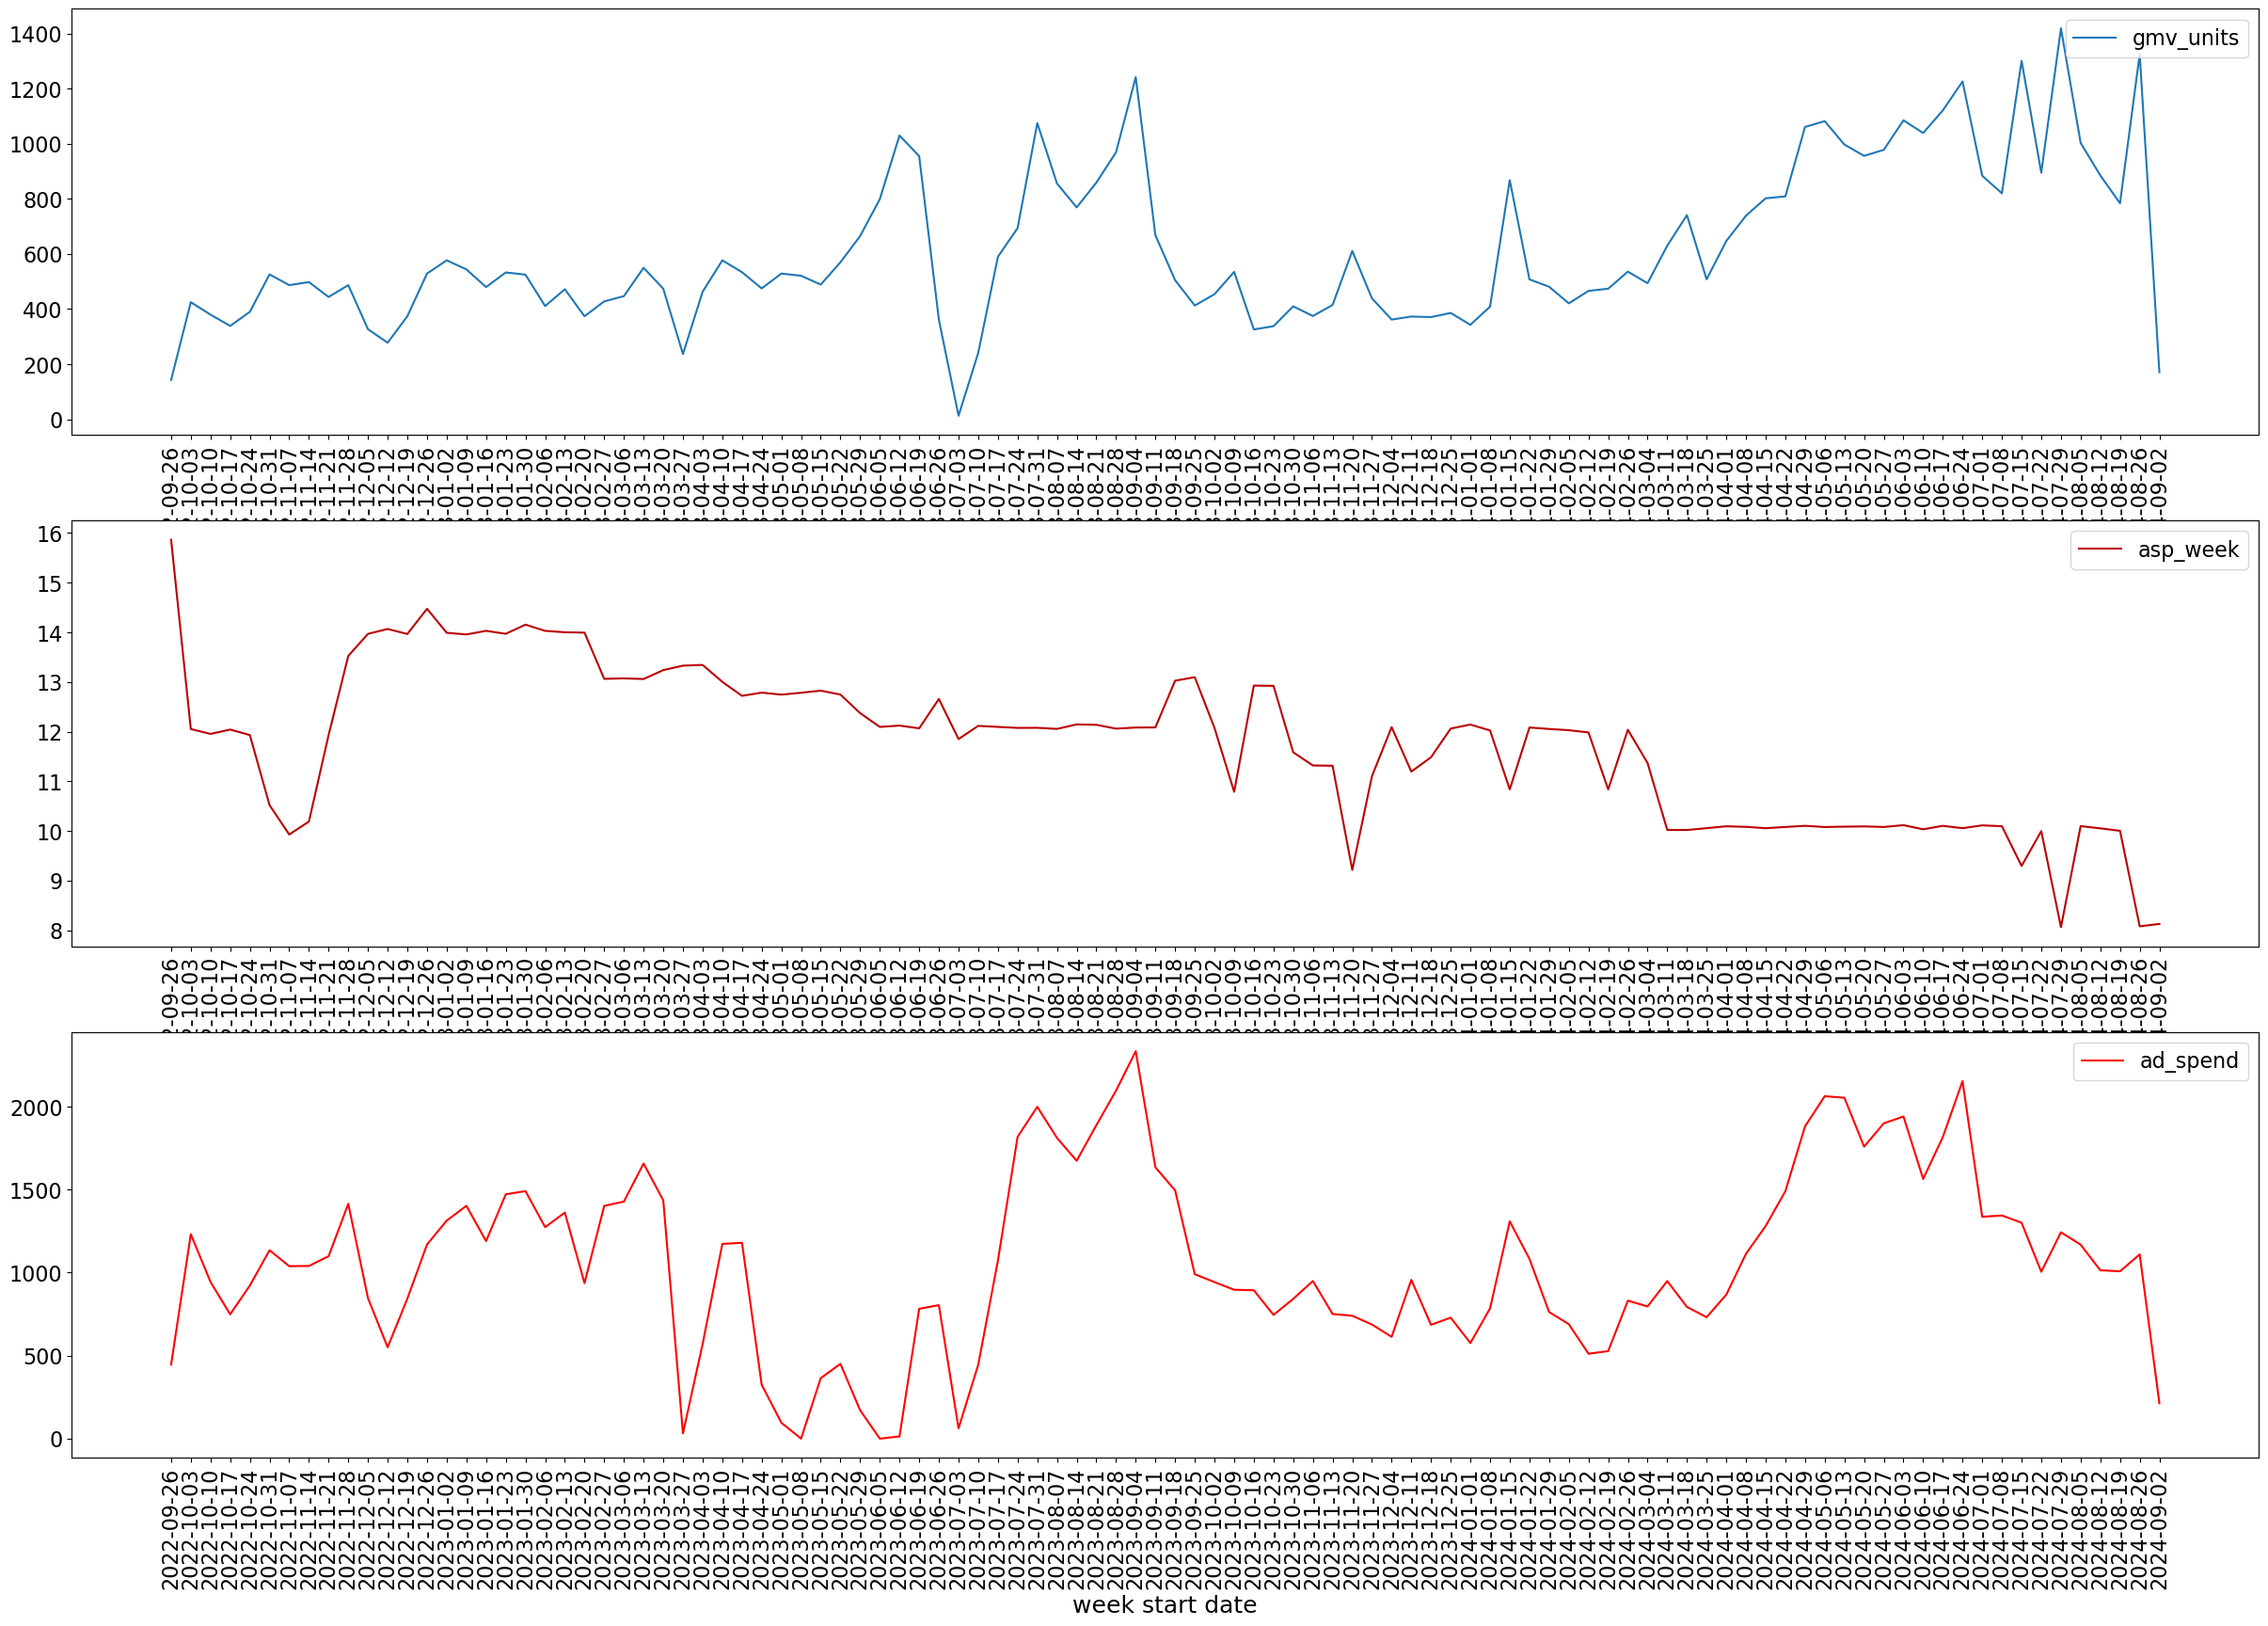

In [133]:
plot_sales('B07R27WXXB',df_base)

In [8]:
# Filtering data for 2024
# Convert Week_Start_date to datetime if it's not already

df_weekly['Week_Start_date'] = pd.to_datetime(df_weekly['Week_Start_date'])

# Define the date range
start_date = pd.to_datetime('2024-01-01')
end_date = pd.to_datetime('2024-08-31')

# Apply the filter
df_weekly_base_data_filtered = df_weekly[
    (df_weekly['Week_Start_date'] >= start_date) & 
    (df_weekly['Week_Start_date'] < end_date)
]

df_weekly_base_data_filtered
# Save the weekly report to a CSV file
df_weekly_base_data_filtered.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/'+brands_channel_str+'_weekly_data_20204.csv', index=False)


#WAPE and WAPE buckets

file_path_3 = r"C:\Users\Poovesh Kumar M\Downloads\Planning\B3 MP\0_Data\CA\MP_CA_WAPE_Buckets_Forecast_input_adj.csv"
df_data_wape = pd.read_csv(file_path_3)

df_data_wape['absolute_error_AP'] = abs(df_data_wape['Actual'] - df_data_wape['Planned'])
df_data_wape['absolute_error_AF'] = abs(df_data_wape['Actual'] - df_data_wape['Forecasted_sales'])

df_data_wape_may = df_data_wape[df_data_wape['Month'] == 'May']
df_data_wape_jun = df_data_wape[df_data_wape['Month'] =='June']
df_data_wape_july = df_data_wape[df_data_wape['Month'] == 'July']
df_data_wape_aug = df_data_wape[df_data_wape['Month'] == 'August']



df_data_wape_may
df_data_wape_jun
df_data_wape_july
df_data_wape_aug


# df_data_wape1 = df_data_wape_may
# df_data_wape1 = df_data_wape_jun
# df_data_wape1 = df_data_wape_july
df_data_wape1 = df_data_wape_aug

# Calculate WAPE for asin :
wape_per_asin_AP = df_data_wape1.groupby(['ASIN']).apply(
    lambda x: x['absolute_error_AP'].sum() / x['Actual'].sum()
).reset_index(name='WAPE')

# Calculate WAPE for asin :
wape_per_asin_AF = df_data_wape1.groupby(['ASIN']).apply(
    lambda x: x['absolute_error_AF'].sum() / x['Actual'].sum()
).reset_index(name='WAPE')




# Wape_buckets
df = wape_per_asin_AP
df = wape_per_asin_AF


# Assuming df has columns: ['asin', 'WAPE']

conditions = [
    (df['WAPE'] <= 0.10),
    (df['WAPE'] > 0.10) & (df['WAPE'] <= 0.20),
    (df['WAPE'] > 0.20) & (df['WAPE'] <= 0.30),
    (df['WAPE'] > 0.30) & (df['WAPE'] <= 0.40),
    (df['WAPE'] > 0.40) & (df['WAPE'] <= 0.50),
    (df['WAPE'] > 0.50) & (df['WAPE'] <= 0.60),
    (df['WAPE'] > 0.60) & (df['WAPE'] <= 0.70),
    (df['WAPE'] > 0.70) & (df['WAPE'] <= 0.80),
    (df['WAPE'] > 0.80) & (df['WAPE'] <= 0.90),
    (df['WAPE'] > 0.90) & (df['WAPE'] <= 1.00),
    (df['WAPE'] > 1.00)
]

choices = [
    "A. 0 - 10%",
    "B. > 10% - 20%",
    "C. > 20% - 30%",
    "D. > 30% - 40%",
    "E. > 40% - 50%",
    "F. > 50% - 60%",
    "G. > 60% - 70%",
    "H. > 70% - 80%",
    "I. > 80% - 90%", 
    "J > 90% - 100%",
    "K.> 100%"
]

df['wape_bucket'] = np.select(conditions, choices, default='Other')


# Summarize the count of ASINs in each WAPE bucket
bucket_summary = df.groupby('wape_bucket').size().reset_index(name='asin_count')

# Sort the result for a cleaner view (optional)
bucket_summary = bucket_summary.sort_values(by='wape_bucket')

# Display the summary
print(bucket_summary)


# Save the forecast results to a CSV file
df.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/B3 MP/2 CA/WAPE_summary_AP_aug.csv', index=False)
df.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/B3 MP/2 CA/WAPE_summary_AF_jul.csv', index=False)

# bucket_summary.to_csv('C:/Users/Poovesh Kumar M/Downloads/Planning/bucket_summary_Jul_AP.csv', index=False)
